# Bike Sharing Demand

In [75]:
import numpy as np
import pandas as pd 

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df_train = pd.read_csv('/home/jaeyoon89/jaeyoon_study/train_bike.csv')
df_test = pd.read_csv('/home/jaeyoon89/jaeyoon_study/test_test.csv')

In [78]:
df_train.shape, df_test.shape

((10886, 12), (6493, 9))

In [79]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [80]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [81]:
df_train.columns, df_test.columns

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed'],
       dtype='object'))

In [82]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

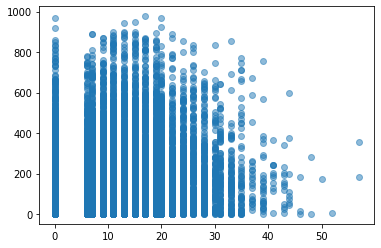

In [84]:
plt.scatter(x = df_train['windspeed'], y=df_train['count'], alpha=.5)
plt.show()

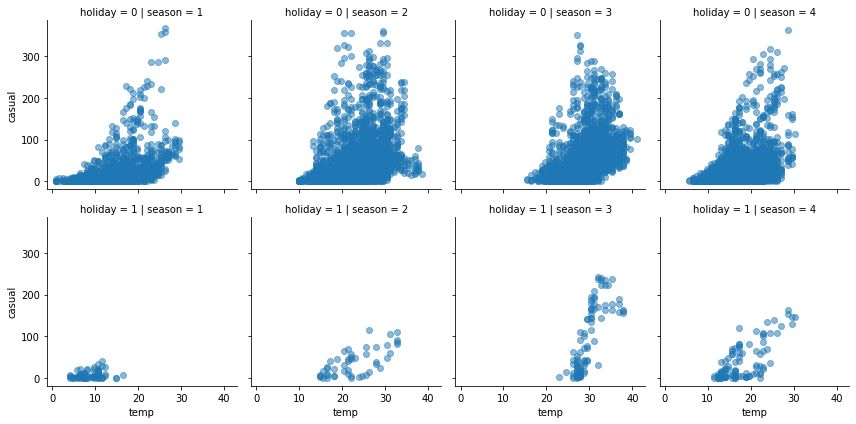

In [85]:
grid = sns.FacetGrid(df_train, col = 'season', row= 'holiday')
grid.map(plt.scatter, 'temp','casual',alpha=0.5)

In [86]:
df_train[['count','holiday']].groupby(['holiday'], as_index=False).mean().sort_values(by='count')

,holiday,count
1,1,185.877814
0,0,191.741655


In [87]:
df_train[['count','workingday']].groupby(['workingday'], as_index = False).mean().sort_values(by='count')

,workingday,count
0,0,188.506621
1,1,193.011873


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import model_selection, preprocessing
from xgboost import XGBClassifier
from datetime import date

In [89]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [90]:
df_train.datetime = df_train.datetime.apply(pd.to_datetime)
df_train['month'] = df_train.datetime.apply(lambda x: x.month)
df_train['hour'] = df_train.datetime.apply(lambda x: x.hour)
df_train['day'] = df_train.datetime.apply(lambda x: x.day)
df_train['year'] = df_train.datetime.apply(lambda x: x.year)
df_train.drop(['datetime'], 1, inplace = True)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1,2011


In [91]:
df_test.datetime = df_test.datetime.apply(pd.to_datetime)
df_test['month'] = df_test.datetime.apply(lambda x: x.month)
df_test['hour'] = df_test.datetime.apply(lambda x: x.hour)
df_test['day'] = df_test.datetime.apply(lambda x: x.day)
df_test['year'] = df_test.datetime.apply(lambda x: x.year)
df_test.drop(['datetime'], 1, inplace = True)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,day,year
0,1,0,1,1,10.66,11.365,56,26.0027,1,0,20,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,1,20,2011
2,1,0,1,1,10.66,13.635,56,0.0000,1,2,20,2011
3,1,0,1,1,10.66,12.880,56,11.0014,1,3,20,2011
4,1,0,1,1,10.66,12.880,56,11.0014,1,4,20,2011


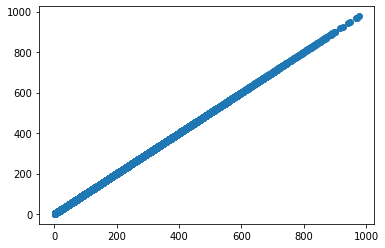

In [92]:
plt.scatter(x = df_train['casual'] + df_train['registered'], y = df_train['count'])
plt.show()

In [93]:
X = np.array(df_train.drop(df_train[['casual','registered','count']], 1))
y = np.array(df_train['count'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [94]:
lr= LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print("The accuracy of linear regression is: ", lr.score(X_test, y_test))

The accuracy of linear regression is:  0.4015883837930191


In [95]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print("The accuracy of Decision Tree Regressor is: ", dt.score(X_test, y_test))

The accuracy of Decision Tree Regressor is:  0.8748584768163784


In [96]:
rf = RandomForestRegressor(n_estimators= 200)
rf.fit(X_train, y_train)
print('The accuracy of Random Forest Regressor is: ', rf.score(X_test, y_test))

The accuracy of Random Forest Regressor is:  0.9396196286925597


In [97]:
gbr = GradientBoostingRegressor(n_estimators=4000,alpha=0.01) 
gbr.fit(X_train, y_train)
print('The accuracy of Gradient Boosting Regressor is: ', gbr.score(X_test, y_test))

The accuracy of Gradient Boosting Regressor is:  0.9336580270141098


In [98]:
xgb  = XGBClassifier(tree_method='hist', random_state=42)
xgb.fit(X_train, y_train)
print('The accuracy of Gradient Boosting Regressor is: ', xgb.score(X_test, y_test))

/home/jaeyoon89/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:45] WARNING: /tmp/pip-build-gopfpmzp/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of Gradient Boosting Regressor is:  0.020202020202020204
